<a href="https://colab.research.google.com/github/mgnarag/Geology-image-classification/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Geology (Ate Grass)/3 classes/"

 1872_Mindanao_NAP_D.FedericoCaballero.tif
 1885_Mactan_NAP_FelixPelayo.tiff
 201464423-23022858-PaymentSlip.pdf
 313490484_646790150357239_663796780442369775_n.jpg
 361079911_248325231393045_2145216296096417082_n.jpg
'Applied Physics 184 FX-2'
 Architectural_designs
 autoencoder_32
'autoencoder_32 (1)'
 autoencoder_64
'BS Applied Physics'
 Classroom
'CLEAN_[WB] 1872_Mindanao_NAP_D (1).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (2).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (3).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif'
'Colab Notebooks'
'CONSENT_NARAG_MARK JEREMY_G.pdf'
 CONSENT_NARAG_MARKJEREMY_G.pdf
 CS284
'Dorm bill.png'
 fingerprint.pb
 FN.png
 FP.png
'Geology (Ate Grass)'
'Getting started.pdf'
 image.jpg
 IMG_5032.jpeg
 IMG_6546.PNG
'IMG_9359 (1).PNG'
 IMG_9359.PNG
'Information Sharing Consent Form - NARAG.pdf'
'Information Sharing Consent Form.pdf'
'[Journal of Cultural Heritage] Discovering artistic influences of painte

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import os

# Function to resize images to 227x227
def resize_image(image_path):
    img = load_img(image_path, target_size=(227, 227))
    img_array = img_to_array(img) / 255.0
    return img_array

# Load and preprocess training data
train_images = []
train_labels = []

train_dir = file_path + '/Training/'
classes = os.listdir(train_dir)

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        train_images.append(resize_image(image_path))
        train_labels.append(class_name)


In [5]:
train_images = np.array(train_images)
print(np.shape(train_images))

from sklearn.preprocessing import LabelEncoder

# Encode class names into numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Convert numerical labels to one-hot encoded vectors
train_labels = to_categorical(train_labels_encoded, num_classes=3)

print(np.shape(train_labels))

(2400, 227, 227, 3)
(2400, 3)


In [6]:
#AlexNet architecture from scratch
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train  model
model.fit(train_images, train_labels, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 12s 34ms/step - loss: 1.1008 - accuracy: 0.3233
Epoch 2/100
75/75 [==============================] - 3s 34ms/step - loss: 1.0993 - accuracy: 0.3304
Epoch 3/100
75/75 [==============================] - 3s 34ms/step - loss: 1.0990 - accuracy: 0.3262
Epoch 4/100
75/75 [==============================] - 3s 34ms/step - loss: 1.0992 - accuracy: 0.3379
Epoch 5/100
75/75 [==============================] - 3s 37ms/step - loss: 1.0416 - accuracy: 0.4112
Epoch 6/100
75/75 [==============================] - 3s 36ms/step - loss: 0.8745 - accuracy: 0.5442
Epoch 7/100
75/75 [==============================] - 3s 36ms/step - loss: 0.7427 - accuracy: 0.6067
Epoch 8/100
75/75 [==============================] - 3s 34ms/step - loss: 0.6641 - accuracy: 0.6338
Epoch 9/100
75/75 [==============================] - 3s 34ms/step - loss: 0.5825 - accuracy: 0.7033
Epoch 10/100
75/75 [==============================] - 3s 34ms/step - loss: 0.5093 - accuracy: 0.762

In [7]:

# Load and preprocess test data
test_images = []
test_labels = []

test_dir = file_path + '/Testing/'

for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        test_images.append(resize_image(image_path))
        test_labels.append(class_name)

test_images = np.array(test_images)
# Encode class names into numerical labels
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

# Convert numerical labels to one-hot encoded vectors
test_labels = to_categorical(test_labels_encoded, num_classes=3)  # Assuming 3 output classes

print(np.shape(test_labels))



(250, 3)


8/8 [==============================] - 0s 21ms/step
Classification Report:
                  precision    recall  f1-score   support

     Good_class       0.46      0.43      0.45       105
     Poor_class       0.70      0.52      0.60       123
Very Good_class       0.21      0.59      0.31        22

       accuracy                           0.49       250
      macro avg       0.46      0.51      0.45       250
   weighted avg       0.56      0.49      0.51       250



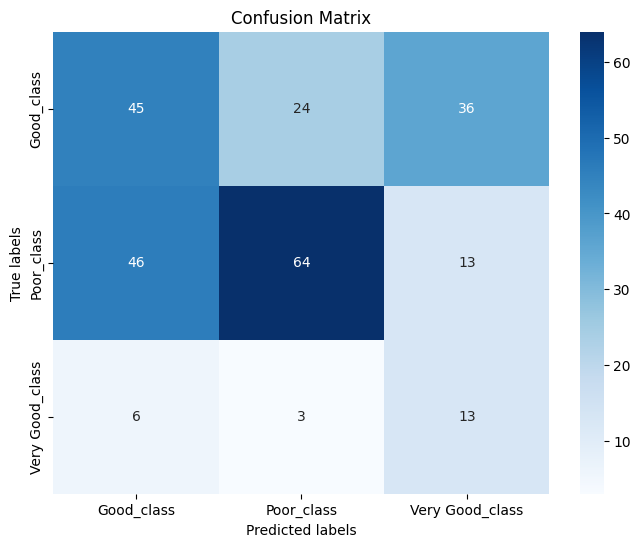

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities for test data
y_pred_prob = model.predict(test_images)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
# Convert one-hot encoded test labels to class labels
y_true = np.argmax(test_labels, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:\n", report)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig(file_path+'confusion_matrix.png')  # Save confusion matrix image

# Save classification report to a text file
with open('classification_report.txt', 'w') as f:
    f.write(report)

# Save confusion matrix to Excel
import pandas as pd

df_cm = pd.DataFrame(cm, index=classes, columns=classes)
df_cm.to_excel(file_path+'confusion_matrix.xlsx')
